<a href="https://colab.research.google.com/github/somyamangla/ensemblemodel/blob/main/EnsembleModelBreast_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

APPLYING STACKING

In [121]:
import numpy as np
import pandas as pd
import missingno
from collections import Counter
from collections import OrderedDict


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

from tabulate import tabulate

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [122]:
dataset = pd.read_csv('breast_dataset.csv')

In [123]:
dataset.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [124]:
labels = ['Has Breast Cancer', 'Does not have Breast Cancer']
values = [len(dataset[dataset['diagnosis'] == 'M']), len(dataset[dataset['diagnosis'] == 'B'])] 

print('Percentage of people having breast cancer: {}'.format(round((values[0] * 100)/sum(values), 2)))
print('Percentage of people not having breast cancer: {}'.format(round((values[1] * 100)/sum(values), 2)))

Percentage of people having breast cancer: 37.26
Percentage of people not having breast cancer: 62.74


In [125]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [126]:
dataset.diagnosis = dataset.diagnosis.astype('category')

In [127]:
dataset.isnull().sum().sort_values(ascending = False)

id                         0
diagnosis                  0
symmetry_worst             0
concave points_worst       0
concavity_worst            0
compactness_worst          0
smoothness_worst           0
area_worst                 0
perimeter_worst            0
texture_worst              0
radius_worst               0
fractal_dimension_se       0
symmetry_se                0
concave points_se          0
concavity_se               0
compactness_se             0
smoothness_se              0
area_se                    0
perimeter_se               0
texture_se                 0
radius_se                  0
fractal_dimension_mean     0
symmetry_mean              0
concave points_mean        0
concavity_mean             0
compactness_mean           0
smoothness_mean            0
area_mean                  0
perimeter_mean             0
texture_mean               0
radius_mean                0
fractal_dimension_worst    0
dtype: int64

In [128]:
dataset.drop(['id'], axis = 1, inplace = True)
dataset.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [129]:

def min_max_scaling(dataset, column):
    data = list(dataset[column])
    new_data = [(value - min(data))/(max(data) - min(data)) for value in data]
    dataset[column] = new_data

In [130]:
columns = list(dataset.columns)
numerical_columns = columns[1 : ]

for each_column in numerical_columns:
    min_max_scaling(dataset, each_column)
    
dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,M,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,M,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,M,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


we will use 0-1 encoding such that M means 1 and B means 0.

In [131]:
target_column = dataset['diagnosis']
encoded_target = [0 if value == 'B' else 1 for value in target_column]


In [132]:
dataset['diagnosis'] = encoded_target
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


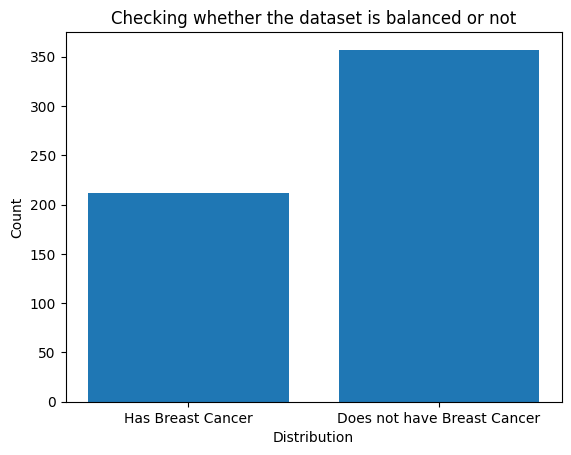

In [133]:
plt.title('Checking whether the dataset is balanced or not')
plt.xlabel('Distribution')
plt.ylabel('Count')
plt.bar(labels, values)
plt.show()

In [134]:
dataset['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [135]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = dataset[(dataset['diagnosis']==0)] 
df_minority = dataset[(dataset['diagnosis']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 357, # to match majority class
                                 random_state=30)  # reproducible results
# Combine majority class with upsampled minority class


In [136]:
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [137]:
dataset=df_upsampled

In [138]:
dataset['diagnosis'].value_counts()

1    357
0    357
Name: diagnosis, dtype: int64

MODEL APPLICATION

In [139]:
X = dataset.iloc[:, 1:].values
Y = dataset.iloc[:, 0].values

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 27)

In [141]:
model_accuracy = OrderedDict()

In [142]:
model_recall = OrderedDict()


SVM

In [143]:
linear_svm_classifier = SVC(kernel = 'linear', random_state = 27)
linear_svm_classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=27)

In [144]:
Y_pred = linear_svm_classifier.predict(X_test)

In [145]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy and recall of the model

linear_svm_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Linear SVM'] = linear_svm_accuracy

linear_svc_recall = round(100 * recall_score(Y_test, Y_pred), 2)
model_recall['Linear SVM'] = linear_svc_recall


print('The accuracy of this model is {} %.'.format(linear_svm_accuracy))
print('The recall of this model is {} %.'.format(linear_svc_recall))


[[71  1]
 [ 4 67]]
The accuracy of this model is 96.5 %.
The recall of this model is 94.37 %.


KNN(5)

In [146]:
classifier_5nn = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_5nn.fit(X_train, Y_train)

KNeighborsClassifier()

In [147]:
Y_pred = classifier_5nn.predict(X_test)

In [148]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy and recall of the model

classifier_5nn_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['K - Nearest Neighbors (5 NN)'] = classifier_5nn_accuracy

classifier_5nn_recall = round(100 * recall_score(Y_test, Y_pred), 2)
model_recall['K - Nearest Neighbors (5 NN)'] = classifier_5nn_recall



print('The accuracy of this model is {} %.'.format(classifier_5nn_accuracy))
print('The recall of this model is {} %.'.format(classifier_5nn_recall))


[[69  3]
 [ 4 67]]
The accuracy of this model is 95.1 %.
The recall of this model is 94.37 %.


NAIVE BAYES

In [149]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, Y_train)
Y_pred = naive_bayes_classifier.predict(X_test)

In [150]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy and recall of the model

naive_bayes_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Gaussian Naive Bayes'] = naive_bayes_accuracy

naive_bayes_recall = round(100 * recall_score(Y_test, Y_pred), 2)
model_recall['Gaussian Naive Bayes'] = naive_bayes_recall

print('The accuracy of this model is {} %.'.format(naive_bayes_accuracy))
print('The recall of this model is {} %.'.format(naive_bayes_recall))

[[70  2]
 [ 8 63]]
The accuracy of this model is 93.01 %.
The recall of this model is 88.73 %.


DECISION TREE

In [151]:
decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 27)
decision_tree_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=27)

In [152]:
Y_pred = decision_tree_classifier.predict(X_test)

In [153]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy and recall of the model

decision_tree_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Decision Tree Classification'] = decision_tree_accuracy

decision_tree_recall = round(100 * recall_score(Y_test, Y_pred), 2)
model_recall['Decision Tree Classification'] = decision_tree_recall

print('The accuracy of this model is {} %.'.format(decision_tree_accuracy))
print('The recall of this model is {} %.'.format(decision_tree_recall))

[[69  3]
 [ 2 69]]
The accuracy of this model is 96.5 %.
The recall of this model is 97.18 %.


RANDOM FOREST(25 TREES)



In [154]:
random_forest_25_classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 27)
random_forest_25_classifier.fit(X_train, Y_train)
Y_pred = random_forest_25_classifier.predict(X_test)

In [155]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy and recall of the model

random_forest_25_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Random Forest Classification (25 trees)'] = random_forest_25_accuracy

random_forest_25_recall = round(100 * recall_score(Y_test, Y_pred), 2)
model_recall['Random Forest Classification (25 trees)'] = random_forest_25_recall

print('The accuracy of this model is {} %.'.format(random_forest_25_accuracy))
print('The recall of this model is {} %.'.format(random_forest_25_recall))

[[67  5]
 [ 1 70]]
The accuracy of this model is 95.8 %.
The recall of this model is 98.59 %.


STACKING

In [156]:
base_models = list()

base_models.append(('decision_tree', decision_tree_classifier))
base_models.append(('5nn', classifier_5nn))
base_models.append(('naive_bayes', naive_bayes_classifier))
base_models.append(('random_forest',random_forest_25_classifier))

### Define the meta models

meta_model = linear_svm_classifier

In [88]:
stacking_classifier = StackingClassifier(estimators = base_models, final_estimator = meta_model)
stacking_classifier.fit(X_train, Y_train)

StackingClassifier(estimators=[('decision_tree',
                                DecisionTreeClassifier(criterion='entropy',
                                                       random_state=27)),
                               ('5nn', KNeighborsClassifier()),
                               ('naive_bayes', GaussianNB()),
                               ('random_forest',
                                RandomForestClassifier(criterion='entropy',
                                                       n_estimators=25,
                                                       random_state=27))],
                   final_estimator=SVC(kernel='linear', random_state=27))

In [157]:
Y_pred = stacking_classifier.predict(X_test)

In [158]:

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy and recall of the model

stacking_classifier_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 5)
model_accuracy['Stacking Classifier'] = stacking_classifier_accuracy

stacking_classifier_recall = round(100 * recall_score(Y_test, Y_pred), 2)
model_recall['Stacking Classifier'] = stacking_classifier_recall


print('The accuracy of this model is {} %.'.format(stacking_classifier_accuracy))
print('The recall of this model is {} %.'.format(stacking_classifier_recall))


[[72  0]
 [ 1 70]]
The accuracy of this model is 99.3007 %.
The recall of this model is 98.59 %.


HARD VOTING CLASSIFIER

In [186]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('decision_tree',decision_tree_classifier),('5nn', classifier_5nn), ('naive_bayes', naive_bayes_classifier), ('random_forest',random_forest_25_classifier), ('linear_svm', linear_svm_classifier)], voting='hard')
score = np.mean(cross_val_score(voting_clf,  X_train, Y_train, scoring='accuracy'))
print("Accuracy : %s" % '{:.2%}'.format(score))
score=score*100
print(score)
hardvoting_classifier_recall = round(100 * recall_score(Y_test, Y_pred), 2)
model_recall['Hard Voting Classifier'] = hardvoting_classifier_recall
model_accuracy['Hard Voting Classifier'] = score


Accuracy : 97.20%
97.19603356216628


SOFT VOTING CLASSIFIER

In [92]:
X = dataset.iloc[:, 1:].values
Y = dataset.iloc[:, 0].values

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 27)

In [51]:
print(np.isnan(X_train).sum())
print(np.isnan(Y_train).sum())

0
0


In [52]:
print(np.unique(Y_train))

[0 1]


In [96]:
X_train

array([[0.09754366, 0.31078796, 0.11250086, ..., 0.39347079, 0.30948157,
        0.33097206],
       [0.39372427, 0.526209  , 0.40501693, ..., 0.69553265, 0.48531441,
        0.28676374],
       [0.38520517, 0.23571187, 0.38000138, ..., 0.43024055, 0.36467573,
        0.27784337],
       ...,
       [0.22381561, 0.19411566, 0.21588004, ..., 0.27024055, 0.23654642,
        0.15099042],
       [0.31421269, 0.45722016, 0.29991017, ..., 0.24652921, 0.21230041,
        0.09504132],
       [0.60717497, 0.42069665, 0.59574321, ..., 0.82061856, 0.23713779,
        0.13846255]])

In [102]:
svc=SVC(random_state=1,probability=True)
classifier_5nn = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto', p = 2, metric = 'minkowski')
decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 27)
random_forest_25_classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 27)
naive_bayes_classifier = GaussianNB()


In [182]:
voting_clf_soft = VotingClassifier(estimators=[
    ('decision_tree', decision_tree_classifier),
    ('5nn', classifier_5nn),
    ('naive_bayes', naive_bayes_classifier),
    ('random_forest', random_forest_25_classifier),
    ('linear_svm', svc)],
    voting='soft')
voting_clf_soft.fit(X_train, Y_train)
Y_pred = voting_clf_soft.predict(X_test)
accuracy = round(100 * accuracy_score(Y_test, Y_pred), 5)
print(accuracy)

softvoting_classifier_recall = round(100 * recall_score(Y_test, Y_pred), 2)
model_recall['Soft Voting Classifier'] = softvoting_classifier_recall
model_accuracy['Soft Voting Classifier'] = accuracy



99.3007


In [183]:
keys = model_accuracy.keys()
values = model_accuracy.values()
print(keys)
print(values)

odict_keys(['Linear SVM', 'K - Nearest Neighbors (5 NN)', 'Gaussian Naive Bayes', 'Decision Tree Classification', 'Random Forest Classification (25 trees)', 'Stacking Classifier', 'Hard Voting Classifier', 'Soft Voting Classifier'])
odict_values([96.5, 95.1, 93.01, 96.5, 95.8, 99.3007, 0.9719603356216628, 99.3007])


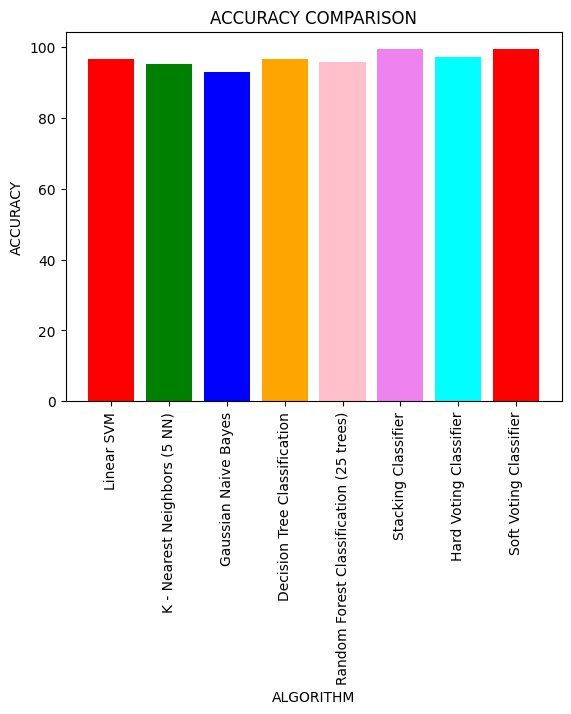

In [187]:
colors = ['red', 'green', 'blue', 'orange','pink','violet','cyan']
plt.bar(keys, values, color=colors)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('ALGORITHM')
plt.ylabel('ACCURACY')
plt.title('ACCURACY COMPARISON')

# Show the plot
plt.show()


In [188]:
keys = model_recall.keys()
values = model_recall.values()
print(keys)
print(values)


odict_keys(['Linear SVM', 'K - Nearest Neighbors (5 NN)', 'Gaussian Naive Bayes', 'Decision Tree Classification', 'Random Forest Classification (25 trees)', 'Stacking Classifier', 'Hard Voting Classifier', 'Soft Voting Classifier'])
odict_values([94.37, 94.37, 88.73, 97.18, 98.59, 98.59, 98.59, 98.59])


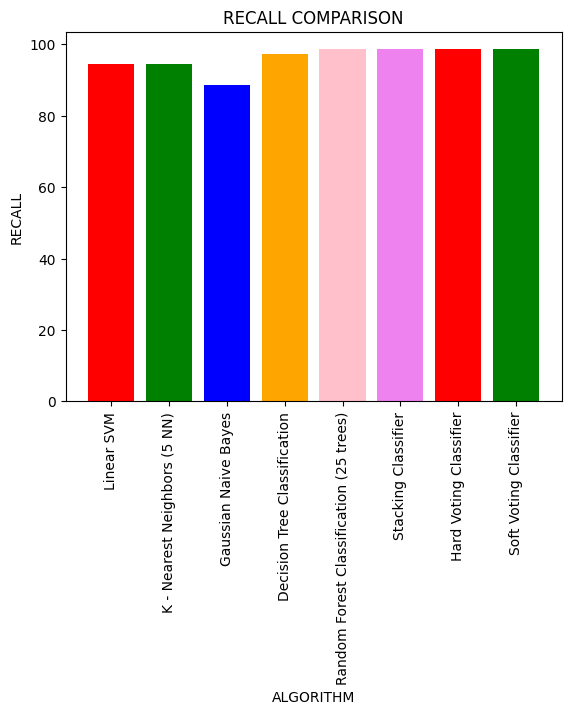

In [189]:
colors = ['red', 'green', 'blue', 'orange','pink','violet']
plt.bar(keys, values, color=colors)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('ALGORITHM')
plt.ylabel('RECALL')
plt.title('RECALL COMPARISON')

# Show the plot
plt.show()

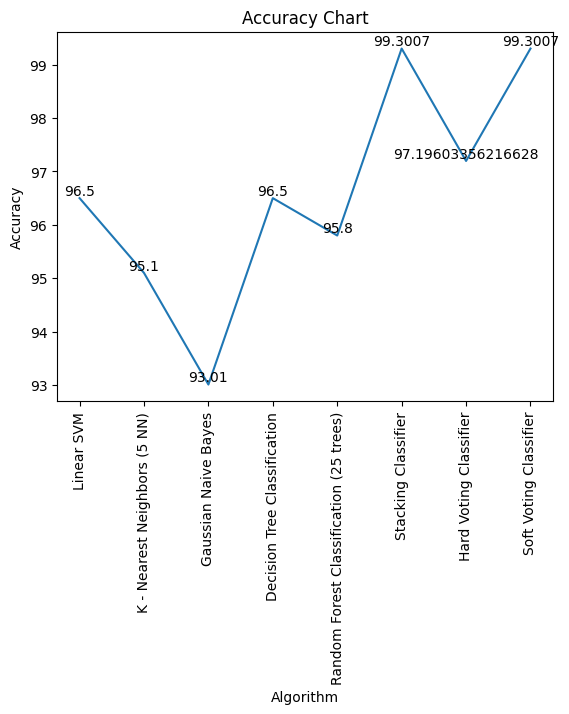

In [190]:
keys = list(model_accuracy.keys())
values = list(model_accuracy.values())

# Plot the data with a line plot
plt.plot(keys, values)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add labels to the data points
for i, j in zip(keys, values):
    plt.text(i, j, str(j), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Chart')

# Show the plot
plt.show()

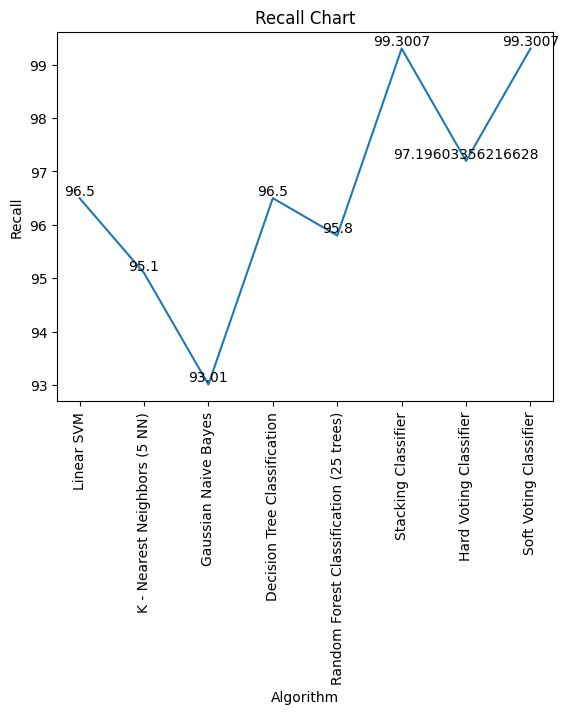

In [191]:
keys = list(model_accuracy.keys())
values = list(model_accuracy.values())

# Plot the data with a line plot
plt.plot(keys, values)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add labels to the data points
for i, j in zip(keys, values):
    plt.text(i, j, str(j), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Recall')
plt.title('Recall Chart')

# Show the plot
plt.show()
